# Human health in recent history
## Author:Aleksis Datseris 
## July 23, 2019 

###  Abstract
Human health has changed incredibly in recent history more than any other period in human history.We are going  to see how has average life expectancy changed and what has affected it mostly and what are the leading causes of death and how has their share of deaths changed.

###### First lets make our imports

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statistics

import seaborn as sns

###### Lets get our data
For a data source I'm going to use https://www.data.gov. Data.gov is a large dataset aggregator and the home of the US Government’s open data.This is why I decided to use it as my source.The first dataset we are going to analyse is a dataset of U.S. mortality trends since 1900 highlights the differences in age-adjusted death rates and life expectancy at birth by race and sex.

In [3]:
death_rates = pd.read_csv("NCHS_-_Death_rates_and_life_expectancy_at_birth.csv")
death_rates.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


The "Age-adjusted Death Rate" column is not needed in this research.All we care is to know that life expectancy has been age adjusted.

In [4]:
death_rates = death_rates.drop(columns=["Age-adjusted Death Rate"])
death_rates.rename({"Average Life Expectancy (Years)": "ALE"}, axis = 1, inplace = True)
death_rates.head()

,Year,Race,Sex,ALE
0,2015,All Races,Both Sexes,NaN
1,2014,All Races,Both Sexes,78.9
2,2013,All Races,Both Sexes,78.8
3,2012,All Races,Both Sexes,78.8
4,2011,All Races,Both Sexes,78.7


In [5]:
last_year = death_rates[death_rates.Year == 2015]
last_year

,Year,Race,Sex,ALE
0,2015,All Races,Both Sexes,NaN
116,2015,All Races,Female,NaN
232,2015,All Races,Male,NaN
348,2015,Black,Both Sexes,NaN
464,2015,Black,Female,NaN
580,2015,Black,Male,NaN
696,2015,White,Both Sexes,NaN
812,2015,White,Female,NaN
928,2015,White,Male,NaN


We don't have any data for the year 2015 so I'm going to remove it.

In [6]:
indexes_last_year = last_year.index
death_rates = death_rates.drop(indexes_last_year)

In [7]:
death_rates.head()

,Year,Race,Sex,ALE
1,2014,All Races,Both Sexes,78.9
2,2013,All Races,Both Sexes,78.8
3,2012,All Races,Both Sexes,78.8
4,2011,All Races,Both Sexes,78.7
5,2010,All Races,Both Sexes,78.7


Lest check for more mising data.

In [8]:
print("Dataset unique values for race: {}".format(death_rates.Race.unique()))
print("Dataset unique values for sex: {}".format(death_rates.Sex.unique()))
print("Dataset null values: {}".format(death_rates.isnull().values.any()))
print("Dataset years: {}".format(len(death_rates.Year)))

Dataset unique values for race: ['All Races' 'Black' 'White']
Dataset unique values for sex: ['Both Sexes' 'Female' 'Male']
Dataset null values: False
Dataset years: 1035


In [9]:
print("Dataset data types: \n{}".format(death_rates.dtypes))

Dataset data types: 
Year      int64
Race     object
Sex      object
ALE     float64
dtype: object


We have 9 groups and our data begins from the year 1900.So there is no other missing data.This is expected since this is a dataset published by the "Centers for Disease Control and Prevention".

It's better to split the 9 groups to better analyse the data.

In [10]:
# I'm going to create a function for this.
def get_group(race, sex, data):
    result = data[data.Race == race]
    result = result[result.Sex == sex]
    return result

In [11]:
def get_group(race, sex, data, start = 1900, end = 2014):
    result = data[data.Race == race]
    result = result[result.Sex == sex]
    result = result[result.Year >= start]
    result = result[result.Year <= end]
    return result

In [12]:
def create_graph(data, title = ""):
    plt.figure(figsize = (17, 6))
    plt.plot(data.Year, data.ALE)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Average Life Expectancy")
    plt.show()

In [13]:
def create_graph_comparison(data_1, data_2, label_1, label_2, title = ""):
    plt.figure(figsize = (17, 6))
    plt.plot(data_1.Year, data_1.ALE, label = label_1)
    plt.plot(data_2.Year, data_2.ALE, label = label_2)
    plt.title(title)
    plt.xlabel("Year")
    plt.ylabel("Average Life Expectancy")
    plt.legend()
    plt.show()

In [14]:
white_male = get_group("White", "Male", death_rates)
white_female = get_group("White", "Female", death_rates)
all_white = get_group("White", "Both Sexes", death_rates)
black_male = get_group("Black", "Male", death_rates)
black_female = get_group("Black", "Female", death_rates)
all_black = get_group("Black", "Both Sexes", death_rates)
all_male = get_group("All Races", "Male", death_rates)
all_female = get_group("All Races", "Female", death_rates)
all_people = get_group("All Races", "Both Sexes", death_rates)

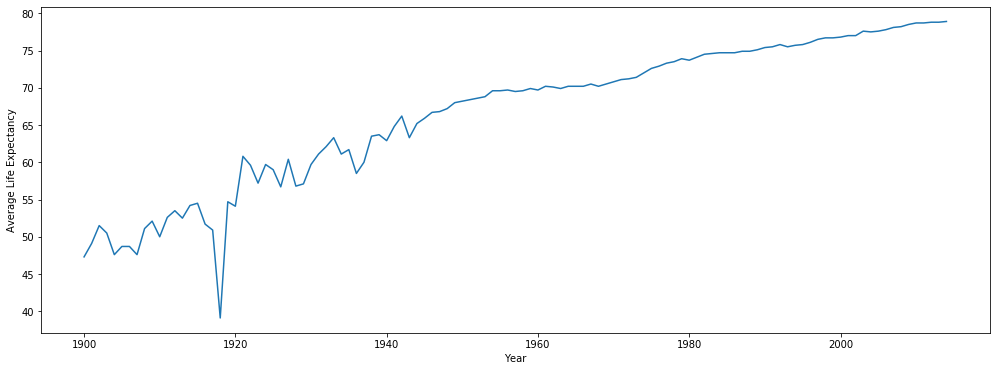

In [15]:
create_graph(all_people)

In [16]:
all_people_ale_1900 = all_people.ALE[all_people.Year == 1900]
all_people_ale_2014 = all_people.ALE[all_people.Year == 2014]
print("Average life expectancy the year 1900: {}".format(all_people_ale_1900.iloc[0]))
print("Average life expectancy the year 2014: {}".format(all_people_ale_2014.iloc[0]))
print("Difference in life expectancy between the two dates: {}".format(all_people_ale_2014.iloc[0] - all_people_ale_1900.iloc[0]))


Average life expectancy the year 1900: 47.3
Average life expectancy the year 2014: 78.9
Difference in life expectancy between the two dates: 31.60000000000001


Average life expectancy has increased by 31.5 years in 115 years

As we can see the growth is quite consistent after the 50s.So let's take a closer look.

In [17]:
all_people_until_50s = get_group("All Races", "Both Sexes", death_rates, 1900, 1950)

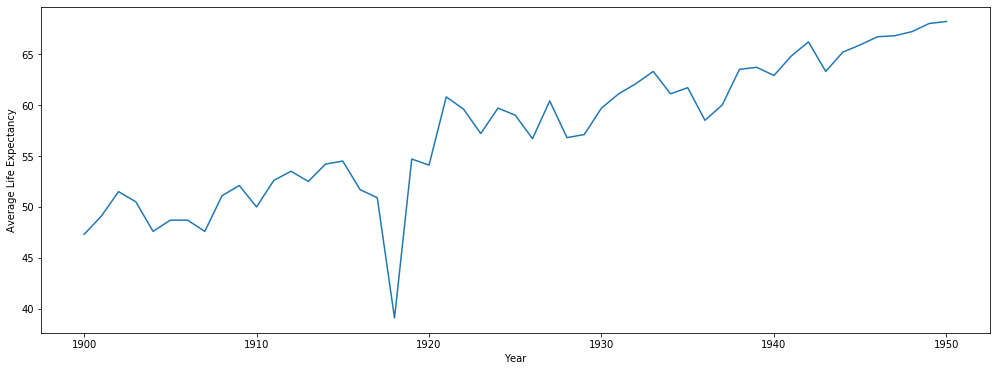

In [18]:
create_graph(all_people_until_50s)

We see that there is a significant drop during WW1.Let's look closer.

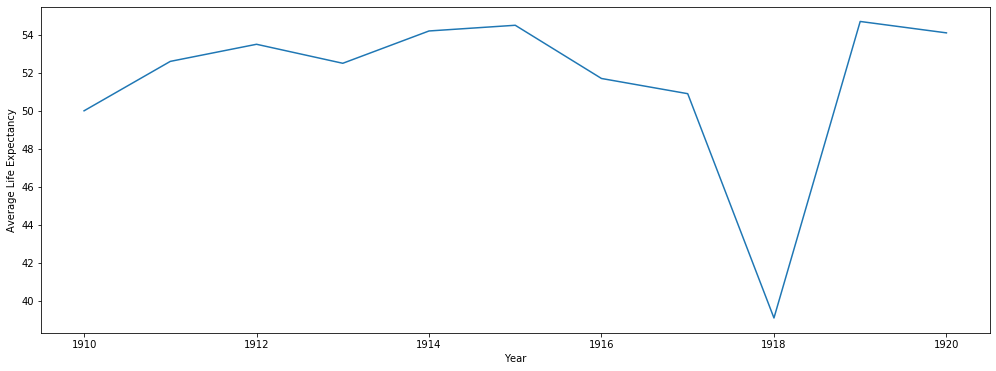

In [19]:
all_people_till_20s = get_group("All Races", "Both Sexes", death_rates, 1910, 1920)
create_graph(all_people_till_20s)

In [20]:
print("Minimum life expectancy by the year 1920: {}".format(all_people_till_20s.ALE.min()))
print("Minimum life expectancy all time: {}".format(all_people.ALE.min()))

Minimum life expectancy by the year 1920: 39.1
Minimum life expectancy all time: 39.1


There is a very possible correlation  between life expectancy and war.Between 1915(which is when the USA joined WW1) and 1918 life expectancy drops from 54.4 to an all time low of 39.1.Also we need to take into account that during March–Nov 1918 outbreak of Spanish influenza killed over 500,000 people in the worst single U.S. epidemic.Wich is a part of the reason why life expectancy drops so much in 1918.

But what about WW2

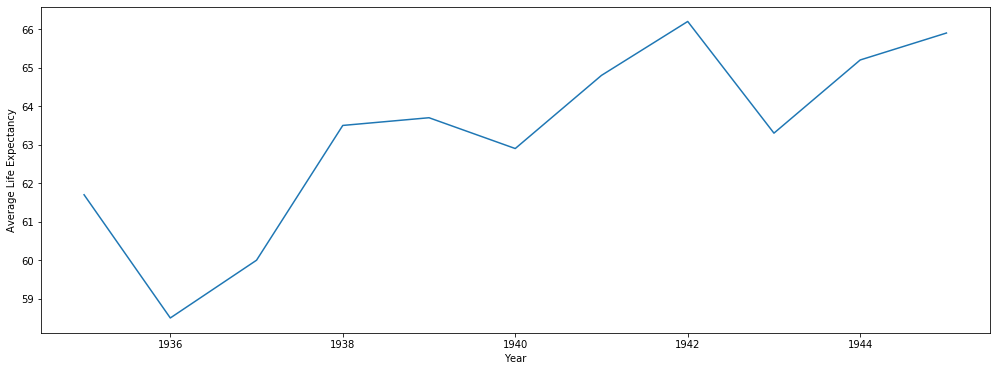

In [21]:
all_people_around_WW2 = get_group("All Races", "Both Sexes", death_rates, 1935, 1945)
create_graph(all_people_around_WW2)

We again see a drop after america joins WW2(December 7, 1941 this is why the drop happens after 1942).But is significantly smaller.

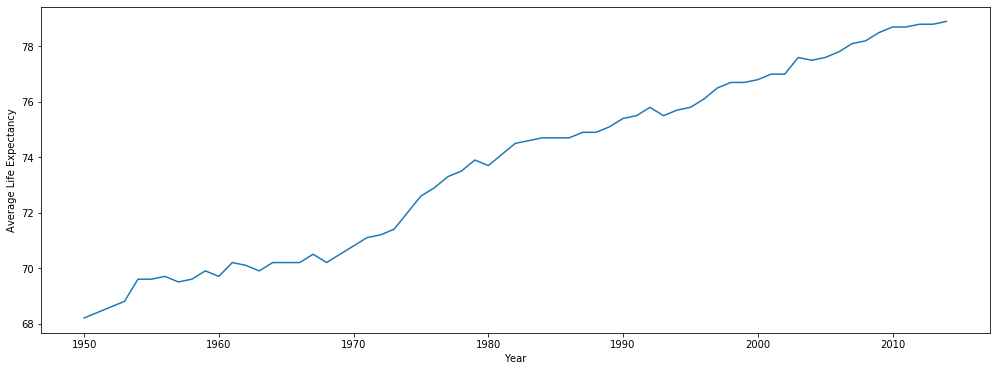

In [22]:
all_people_after50s = get_group("All Races", "Both Sexes", death_rates, 1950, 2015)
create_graph(all_people_after50s)

After the 1950s there is stready increase whit some dispersion but a lot less than before the 50s.And whit no cases on the scale of WW1.Even during WW2.

In [23]:
print("Std of the data: {}".format(all_people.ALE.std()))
print("Std of the data until the 50s: {}".format(all_people_until_50s.ALE.std()))
print("Std of the data after the 50s: {}".format(all_people_after50s.ALE.std()))

Std of the data: 9.631047398352953
Std of the data until the 50s: 6.760734384056565
Std of the data after the 50s: 3.3346426114583623


What we observe is that since the year 1900 average life expectancy has increased significantly.This is due to varaety of reasons some of the most obvious are the popularization of soap, availability of clean water and advance in medicine.War obviously has an effect but after the 1950s it seems like it's effect are becoming less impactful because form 1900 to 1950 America was involved in 17 wars, from 1950 to 2000 23 and from 2000 to 2019 11 more.So even though wars are increasing variation in the data is decreasing.This is due to a varaety of reasons.Firstly it's clear the not all wars are equal the scale of the war depends greatly.Also there is the mechanization of war.We are capable of doing more with less.Most importantly with less **human resourses**.Thanks to machines like the tank a few people have the destruction power of a whole batatalion.Also thanks to inventions like the drone we can fight without even having to risk lives on our side of the battlefield and we know the history of the modern wars of America and how developed were the countries they fought.But here is where the big player comes into play **antibiotics**.Alexander Fleming discovered modern day penicillin in 1928.Ernst Chain, Howard Florey and Edward Abraham succeeded in purifying the first penicillin, "penicillin G" in 1942, but it did not become widely available outside the Allied military before 1945.Around this time is when we see the decrease in dispersion.So what we can conclude for now is that one off the most important inventions for human health is the antibiotic.One off the reasons why antibiotics help so much even during wars is because if you don't have access to antibiotics even a small cut if not cept clean which is extremely likely in a contaminated area(like a battlefield) could lead to a deadly infection.Also there obliusly are less outbreaks.

How does the data change between black and white.

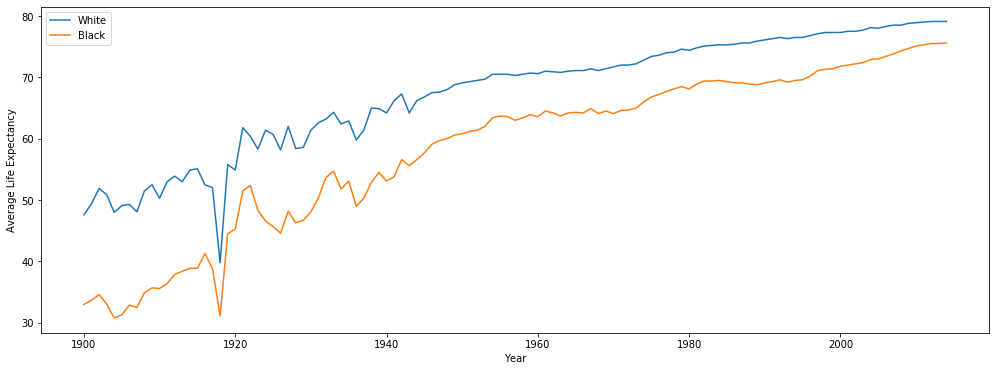

In [24]:
create_graph_comparison(all_white, all_black, "White", "Black")

In [25]:
white_ale_1900 = all_white.ALE[all_white.Year == 1900]
white_ale_2014 = all_white.ALE[all_white.Year == 2014]
black_ale_1900 = all_black.ALE[all_black.Year == 1900]
black_ale_2014 = all_black.ALE[all_black.Year == 2014]
print("Difference in life expectancy between white and black in the year 1900: {}"
      .format(white_ale_1900.iloc[0] - black_ale_1900.iloc[0]))
print("Difference in life expectancy between white and black in the year 2014: {}"
      .format(white_ale_2014.iloc[0] - black_ale_2014.iloc[0]))

Difference in life expectancy between white and black in the year 1900: 14.600000000000001
Difference in life expectancy between white and black in the year 2014: 3.5


The difference in life expectancy between black and white has decreased from 14.5 to 3.5 years.

We don't see something that suspicious.The life expectancy for black people is significantly less caused by racial discrimination and social status.But thankfully we can see that with time the difference is decreasing a lot.The only anomaly big enough to take a closer look is a period between the 20s and 30s where life expectancy is increasing for white people and decreasing for black.

In [26]:
all_white_20s_to_30s = get_group("White", "Both Sexes", death_rates, 1920, 1930)
all_black_20s_to_30s = get_group("Black", "Both Sexes", death_rates, 1920, 1930)

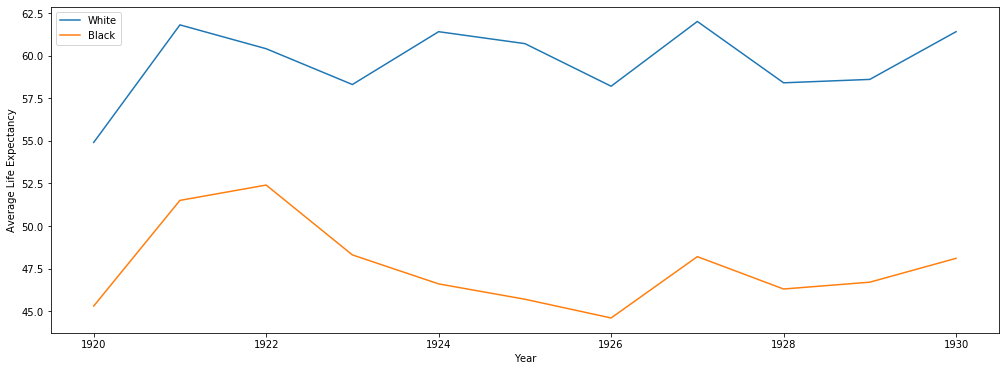

In [27]:
create_graph_comparison(all_white_20s_to_30s, all_black_20s_to_30s, "White", "Black")

The biggest anomaly we see is during 1923 I tried to find a cause the only thing I found is the Last Indian Uprising happened during 1923 but it had very little casualties and it would only affect native Americans.

How does the data change between male and female.

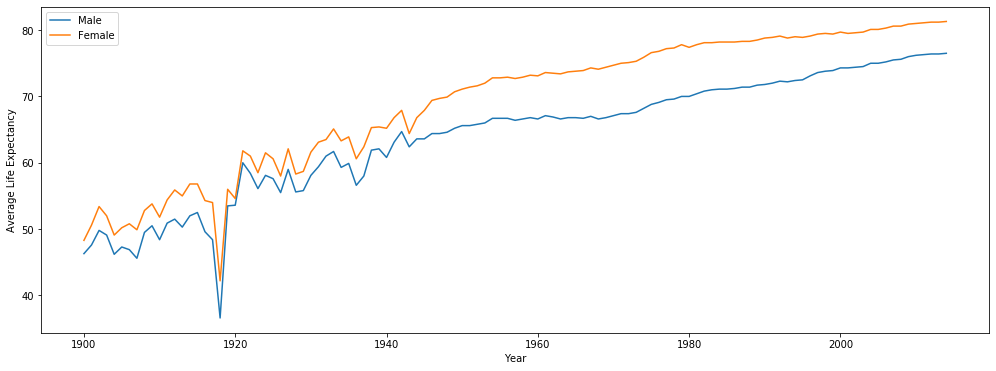

In [28]:
create_graph_comparison(all_male, all_female, "Male", "Female")

There are a few interesting  that we notice.Firstly our previous theory about the effects of war is debuncked by the fact that very few women were part of the US military(In 1917 were the first female members of the U.S. military killed in the line of duty.) but life expectancy dips and peacs at the same time equally for men and women.So the big dip in 1918 is ultimately caused mostly by the Spanish influenza.Which show that war atleast in the U.S. history since 1900 has't played such a significatnt part in life expectancy atleast not as big as epidemics and medicine.

The secon interesting thing than we can observe is the gap between male and female life expectancy

In [29]:
male_ale_1900 = all_male.ALE[all_male.Year == 1900]
male_ale_2014 = all_male.ALE[all_male.Year == 2014]
female_ale_1900 = all_female.ALE[all_female.Year == 1900]
female_ale_2014 = all_female.ALE[all_female.Year == 2014]
print("Difference in life expectancy between male and female in the year 1900: {}"
      .format(female_ale_1900.iloc[0] - male_ale_1900.iloc[0]))
print("Difference in life expectancy between male and female in the year 2014: {}"
      .format(female_ale_2014.iloc[0] - male_ale_2014.iloc[0] ))

Difference in life expectancy between male and female in the year 1900: 2.0
Difference in life expectancy between male and female in the year 2014: 4.799999999999997


It's a well know fact that women live longer than men.Interestingly what we notice is that the gap has more than doubled since the year 1900.Secondary it's clear that the gap widens after the 1950.Which supports the theory(by Adriana Lleras-Muney and Claudia Goldin) that in the US, infectious diseases disproportionately affected females between the ages of 5 and 25 in the 19th century, so as the burden of infectious disease fell due to antibiotics for both men and women, it disproportionately helped women.

Now does the data change depending on race.

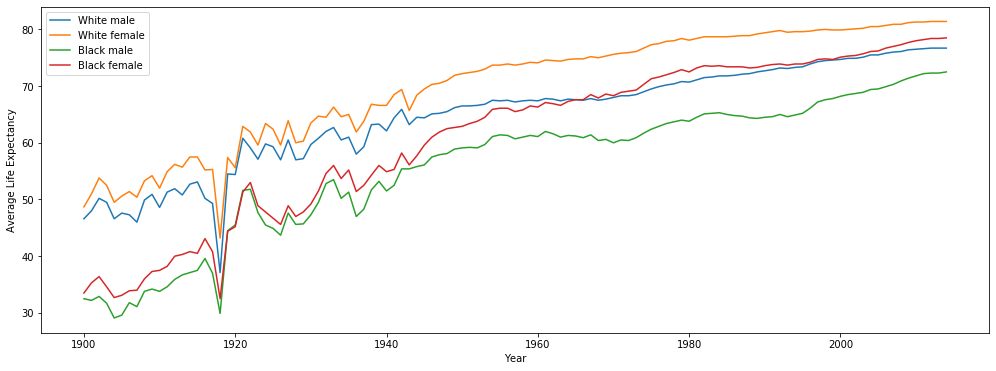

In [30]:
plt.figure(figsize = (17, 6))
plt.plot(white_male.Year, white_male.ALE, label = "White male")
plt.plot(white_female.Year, white_female.ALE, label = "White female")
plt.plot(black_male.Year, black_male.ALE, label = "Black male")
plt.plot(black_female.Year, black_female.ALE, label = "Black female")
plt.xlabel("Year")
plt.ylabel("Average Life Expectancy")
plt.legend()
plt.show()

We need to split the data to get a better look.

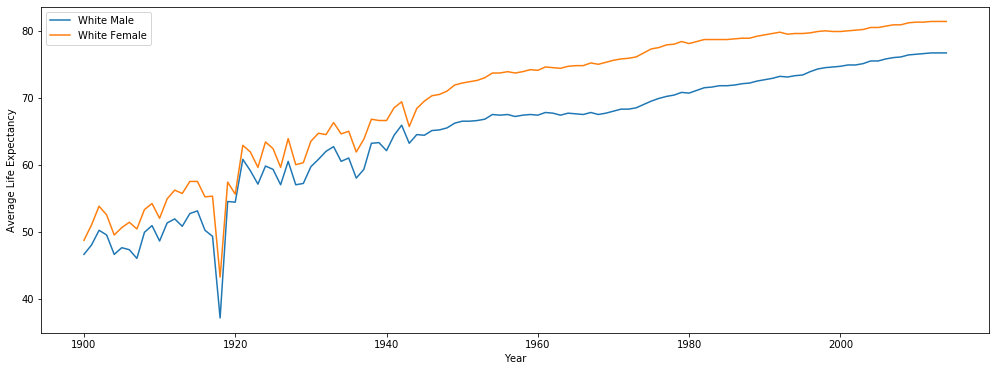

In [31]:
create_graph_comparison(white_male, white_female, "White Male", "White Female")

In [32]:
male_white_15s_to_25s = get_group("White", "Male", death_rates, 1915, 1925)
female_white_15s_to_25s = get_group("White", "Female", death_rates, 1915, 1925)

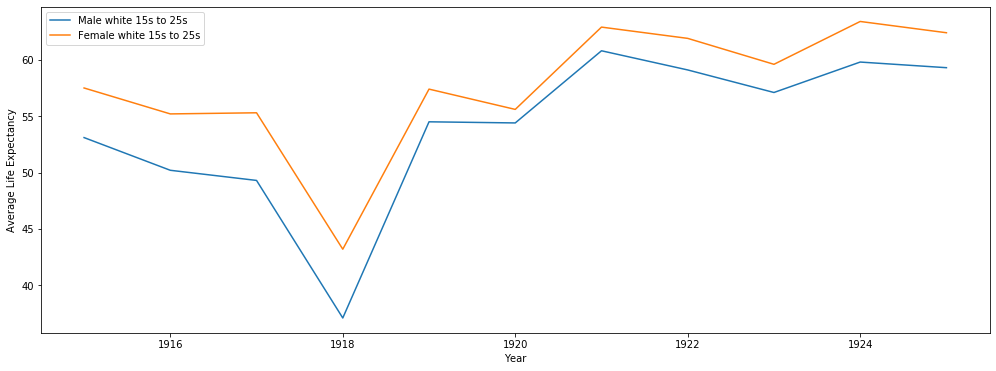

In [33]:
create_graph_comparison(male_white_15s_to_25s, female_white_15s_to_25s, "Male white 15s to 25s", "Female white 15s to 25s")

In [34]:
white_male_ale_1920 = white_male.ALE[white_male.Year == 1920]
white_female_ale_1920 = white_female.ALE[white_female.Year == 1920]
print("Difference in life expectancy between white female and male in the year 1920: {}"
      .format(white_female_ale_1920.iloc[0] - white_male_ale_1920.iloc[0]))

Difference in life expectancy between white female and male in the year 1920: 1.2000000000000028


The only interesting thing we notice is that around the 1920 the gap in life expectancy fall to an all time low of 1 but that is not too big of an anomaly.

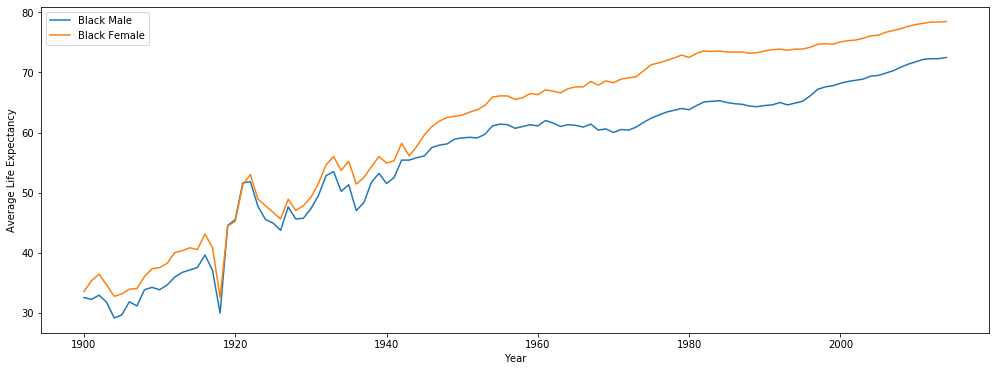

In [35]:
create_graph_comparison(black_male, black_female, "Black Male", "Black Female")

What interesting  that we notice is around the 1920s it seems like life expectancy for black males is more than for females.

In [36]:
male_black_15s_to_25s = get_group("Black", "Male", death_rates, 1915, 1925)
female_black_15s_to_25s = get_group("Black", "Female", death_rates, 1915, 1925)

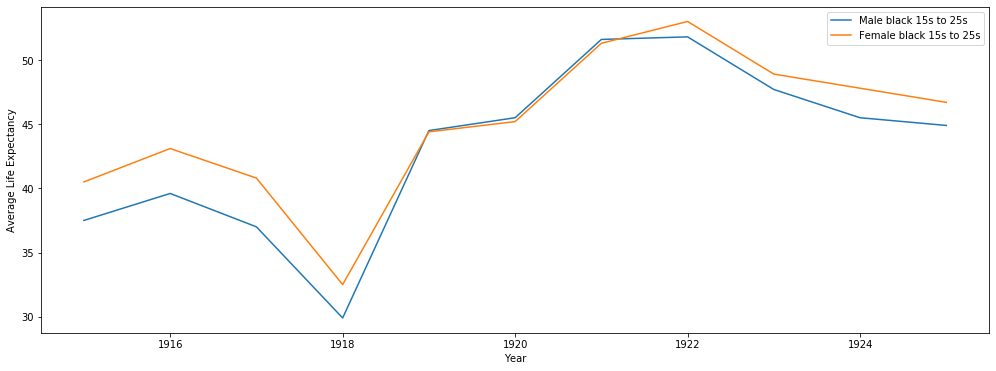

In [37]:
create_graph_comparison(male_black_15s_to_25s, female_black_15s_to_25s, "Male black 15s to 25s", "Female black 15s to 25s")

In [38]:
black_male_ale_1920 = black_male.ALE[black_male.Year == 1920]
black_female_ale_1920 = black_female.ALE[black_female.Year == 1920]
print("Difference in life expectancy between black male and female in the year 1920: {}"
      .format(black_male_ale_1920.iloc[0] - black_female_ale_1920.iloc[0]))

Difference in life expectancy between black male and female in the year 1920: 0.29999999999999716


What is interesting is that the life expectancy for black females drops below that of the males around 1920.I didn't find any well know event that could of caused it so our best guess is that it may be related to the Spanish flu.

Now lets see health in since the 2000s.

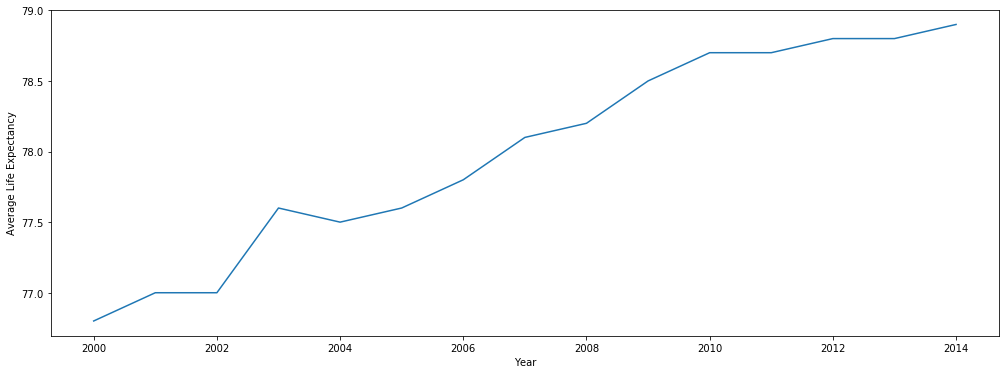

In [39]:
all_people_after2000s = get_group("All Races", "Both Sexes", death_rates, 2000, 2015)
create_graph(all_people_after2000s)

What we notice is significant slow down in growth after 2010 this might be caused due to the increase of Obesity in the US.Unfortunetly we only have data up to 2014.Due to the increase of obesity in the US probably the next 15 years will be the most interesting because we might see for the first time in history life expectancy to drop not because of an epidemic or war but due to lack of self care and food addiction.

Next we are going to look at what are the main causes of death in the US.The first dataset is the number of deaths by the given cause and the second is the percentage of deaths caused by the disease.

In [40]:
num_of_deaths = pd.read_csv("num_of_deaths_us.csv")
share_of_death = pd.read_csv("share_of_deaths_us.csv")

In [41]:
share_of_death.head()

,Unnamed: 0,Year,Cardiovascular_diseases,Cancers,Kidney_disease,Digestive_diseases,Respiratory_diseases,Lower_respiratory_infections,Diabetes,Liver_disease,Drug_disorders,Suicide,Dementia
0,0,1990,40.890313,24.400284,1.424207,3.504285,4.610785,3.172567,5.003982,1.673266,0.278740,1.595960,5.852922
1,1,1991,40.355023,24.552592,1.441479,3.478644,4.742661,3.193792,5.101206,1.649979,0.296387,1.589083,5.994915
2,2,1992,39.886315,24.654040,1.465330,3.466755,4.863606,3.212323,5.212819,1.633343,0.319499,1.576782,6.156208
3,3,1993,39.636391,24.549411,1.493396,3.399832,5.003566,3.243456,5.328724,1.595866,0.349112,1.569961,6.253207
4,4,1994,39.272453,24.498925,1.516613,3.376250,5.115377,3.259746,5.446778,1.576697,0.374814,1.558810,6.385328


In [42]:
share_of_death.isnull().values.any()

False

We don't have any missing data only our index is doubled.

In [43]:
share_of_death = share_of_death.drop(columns = "Unnamed: 0")

In [44]:
share_of_death.head()

,Year,Cardiovascular_diseases,Cancers,Kidney_disease,Digestive_diseases,Respiratory_diseases,Lower_respiratory_infections,Diabetes,Liver_disease,Drug_disorders,Suicide,Dementia
0,1990,40.890313,24.400284,1.424207,3.504285,4.610785,3.172567,5.003982,1.673266,0.278740,1.595960,5.852922
1,1991,40.355023,24.552592,1.441479,3.478644,4.742661,3.193792,5.101206,1.649979,0.296387,1.589083,5.994915
2,1992,39.886315,24.654040,1.465330,3.466755,4.863606,3.212323,5.212819,1.633343,0.319499,1.576782,6.156208
3,1993,39.636391,24.549411,1.493396,3.399832,5.003566,3.243456,5.328724,1.595866,0.349112,1.569961,6.253207
4,1994,39.272453,24.498925,1.516613,3.376250,5.115377,3.259746,5.446778,1.576697,0.374814,1.558810,6.385328


In [45]:
share_of_death.isnull().values.any()

False

The same is the case whit the second dataset.

In [46]:
num_of_deaths = num_of_deaths.drop(columns = "Unnamed: 0")

In [47]:
num_of_deaths.head()

,Year,Cardiovascular_diseases,Cancers,Kidney_disease,Digestive_diseases,Respiratory_diseases,Lower_respiratory_infections,Diabetes,Liver_disease,Drug_disorders,Suicide,Dementia
0,1990,892127.0,516073.0,33081.0,39040.0,101555.0,67896.129546,107889.0,35635.0,6200.0,34561.0,116355.0
1,1991,889858.0,523508.0,33731.0,39452.0,104810.0,69158.286397,111065.0,35607.0,6610.0,34745.0,120394.0
2,1992,890944.0,531279.0,34731.0,39923.0,108288.0,69914.065958,114781.0,35698.0,7150.0,34920.0,124464.0
3,1993,903699.0,541470.0,36089.0,40503.0,113516.0,73047.431416,119874.0,36098.0,7832.0,35331.0,128935.0
4,1994,909279.0,549743.0,37211.0,40993.0,117741.0,74347.880392,124391.0,36391.0,8486.0,35521.0,132828.0


Firts I want to see what share of deaths is caused by the given desease.But because we have data  for 11 diseases(the 10 whit biggest share of deaths based on the year 2016 plus suicide which is at number 11 but I decided to add out of personal interest)and a few diseases account for a very large amount of the total deaths in the US.I'm going to slit the data into two categories.Diseases which caused more than 5% of deaths and diseases which caused less than 5% of deaths based on the year 2016.

In [48]:
share_of_death[share_of_death.Year == 2016]

,Year,Cardiovascular_diseases,Cancers,Kidney_disease,Digestive_diseases,Respiratory_diseases,Lower_respiratory_infections,Diabetes,Liver_disease,Drug_disorders,Suicide,Dementia
26,2016,31.519663,24.347615,2.994753,4.027296,6.897581,3.280862,7.3199,2.212853,2.313014,1.734996,9.099205


In [49]:
share_of_death_high = share_of_death[['Year','Cardiovascular_diseases', 'Cancers', 'Dementia', 
                                     'Diabetes', 'Respiratory_diseases']]

In [50]:
share_of_death_low = share_of_death[['Year', 'Digestive_diseases', 'Lower_respiratory_infections'
        , 'Kidney_disease', 'Drug_disorders', 'Liver_disease', 'Suicide']]

Lets see from what are people in the US most dying from.

In [51]:
def share_of_death_high():
    plt.figure(figsize = (17, 6))
    plt.plot(share_of_death.Year, share_of_death.Cardiovascular_diseases, label = "Cardiovascular diseases")
    plt.plot(share_of_death.Year, share_of_death.Cancers, label = "Cancers")
    plt.plot(share_of_death.Year, share_of_death.Dementia, label = "Dementia")
    plt.plot(share_of_death.Year, share_of_death.Diabetes, label = "Diabetes")
    plt.plot(share_of_death.Year, share_of_death.Respiratory_diseases, label = "Respiratory diseases")
    plt.title("Share of death by cause")
    plt.xlabel("Year")
    plt.ylabel("Share %")
    plt.legend()
    plt.show()

In [52]:
def share_of_death_low():
    plt.figure(figsize = (17, 6))
    plt.plot(share_of_death.Year, share_of_death.Digestive_diseases, label = "Digestive diseases")
    plt.plot(share_of_death.Year, share_of_death.Lower_respiratory_infections, label = "Lower respiratory infections")
    plt.plot(share_of_death.Year, share_of_death.Kidney_disease, label = "Kidney disease")
    plt.plot(share_of_death.Year, share_of_death.Drug_disorders, label = "Drug disorders")
    plt.plot(share_of_death.Year, share_of_death.Liver_disease, label = "Liver disease")
    plt.plot(share_of_death.Year, share_of_death.Suicide, label = "Suicide")
    plt.title("Share of death by cause")
    plt.xlabel("Year")
    plt.ylabel("Share %")
    plt.legend()
    plt.show()

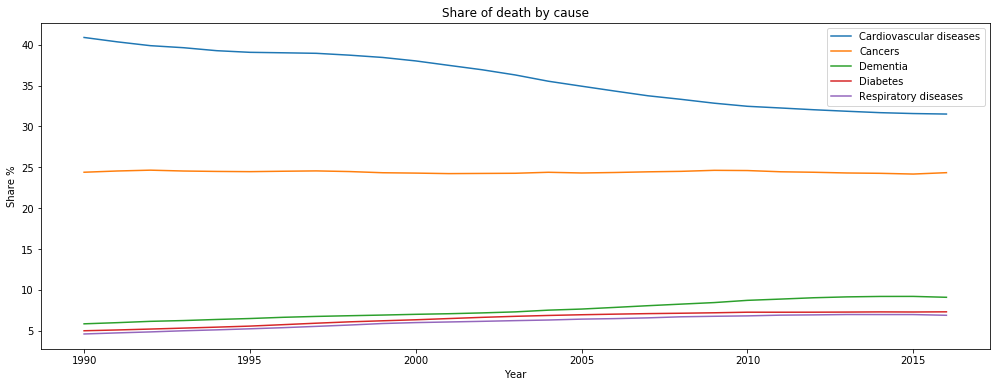

In [53]:
share_of_death_high()

We see a significant decrease in the share of Cardiovascular diseases, canser is mostly the same and there is a slight increase in other diseases.But since this is share it might simply be caused by the decrease in Cardiovascular diseases(or the decrease might be caused by an increase in all other cases but this is very unlikely to happen).Lets look at the  diseases with small share.

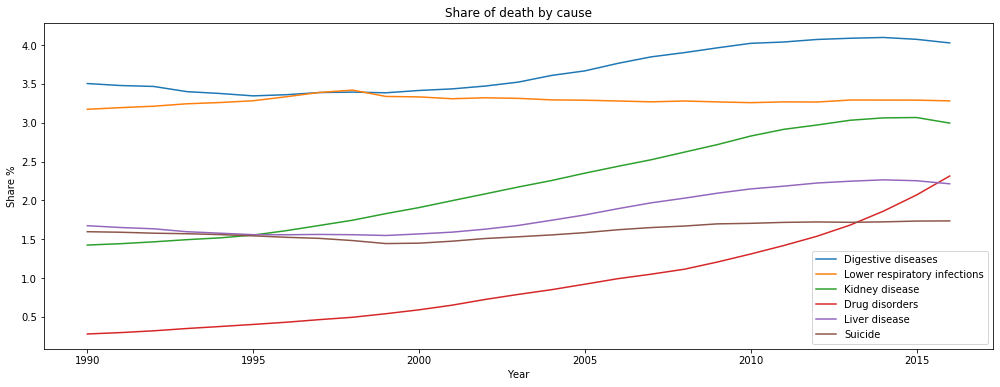

In [54]:
share_of_death_low()

Again we see some increase in some cases but they still look like are caused by the decrease of the share of the Cardiovascular diseases.Where we see a significant increase is in the share of drug disorders which is related to the "Opioid epidemic"(A.k.a. "The Opioid Crisis") which started in the US in the 1990s due to over-prescription of opioids, which led to them becoming the most prescribed class of medications in the United States.

Since this is the only the share we need to look at the number of deaths to get a better picture.I'm going to split the data so that the causes on the graphics mach those on the previous ones.

In [55]:
num_of_deaths.columns

Index(['Year', 'Cardiovascular_diseases', 'Cancers', 'Kidney_disease',
       'Digestive_diseases', 'Respiratory_diseases',
       'Lower_respiratory_infections', 'Diabetes', 'Liver_disease',
       'Drug_disorders', 'Suicide', 'Dementia'],
      dtype='object')

In [56]:
num_of_deaths_high = num_of_deaths[['Year','Cardiovascular_diseases', 'Cancers', 'Dementia', 
                                     'Diabetes', 'Respiratory_diseases']]

In [57]:
num_of_deaths_low = num_of_deaths[['Year', 'Digestive_diseases', 'Lower_respiratory_infections'
        , 'Kidney_disease', 'Drug_disorders', 'Liver_disease', 'Suicide']]

In [58]:
def num_of_death_high():
    plt.figure(figsize = (17, 6))
    plt.plot(num_of_deaths_high.Year, num_of_deaths_high.Cardiovascular_diseases, label = "Cardiovascular diseases")
    plt.plot(num_of_deaths_high.Year, num_of_deaths_high.Cancers, label = "Cancers")
    plt.plot(num_of_deaths_high.Year, num_of_deaths_high.Dementia, label = "Dementia")
    plt.plot(num_of_deaths_high.Year, num_of_deaths_high.Diabetes, label = "Diabetes")
    plt.plot(num_of_deaths_high.Year, num_of_deaths_high.Respiratory_diseases, label = "Respiratory diseases")
    plt.title("Deaths by cause")
    plt.xlabel("Year")
    plt.ylabel("Number of deaths by cause")
    plt.legend()
    plt.show()

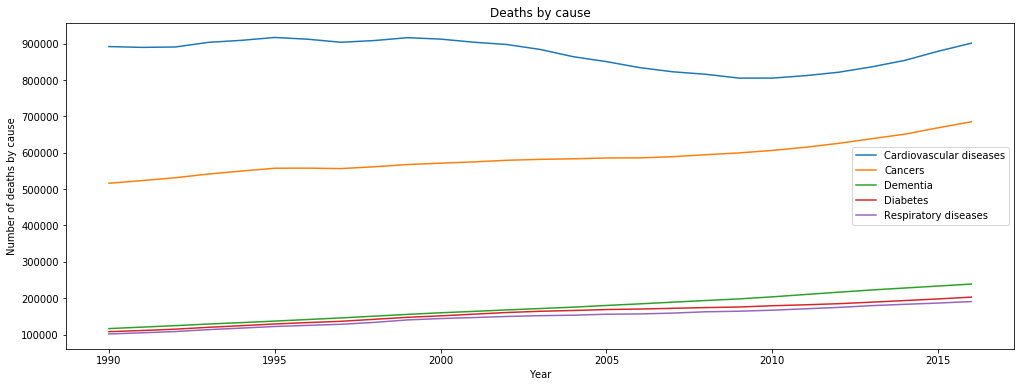

In [59]:
num_of_death_high()

We that after 2000 there is a significant decrease in deaths of cardiovascular diseases by 2015 is back to around 900 000 a year.This and the linear growth in the other cases is normal considering the growth of the US population.

In [60]:
def num_of_death_low():
    plt.figure(figsize = (17, 6))
    plt.plot(num_of_deaths_low.Year, num_of_deaths_low.Digestive_diseases, label = "Digestive diseases")
    plt.plot(num_of_deaths_low.Year, num_of_deaths_low.Lower_respiratory_infections, label = "Lower respiratory infections")
    plt.plot(num_of_deaths_low.Year, num_of_deaths_low.Kidney_disease, label = "Kidney disease")
    plt.plot(num_of_deaths_low.Year, num_of_deaths_low.Drug_disorders, label = "Drug disorders")
    plt.plot(num_of_deaths_low.Year, num_of_deaths_low.Liver_disease, label = "Liver disease")
    plt.plot(num_of_deaths_low.Year, num_of_deaths_low.Suicide, label = "Suicide")
    plt.title("Deaths by cause")
    plt.xlabel("Year")
    plt.ylabel("Number of deaths by cause")
    plt.legend()
    plt.show()

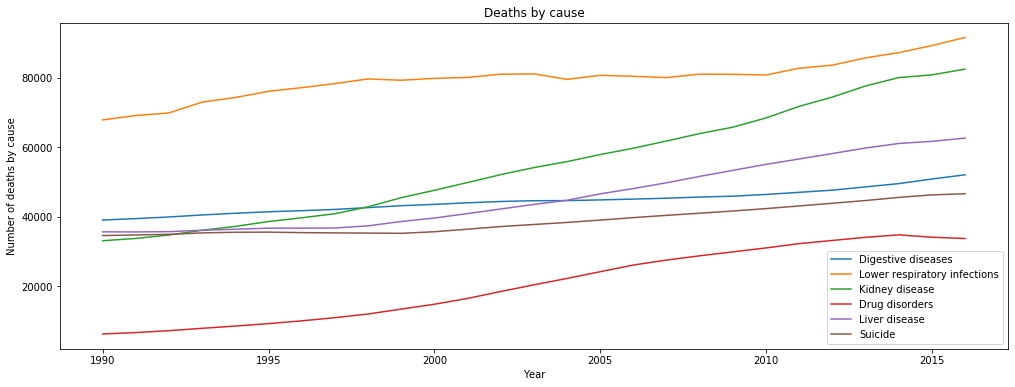

In [61]:
num_of_death_low()

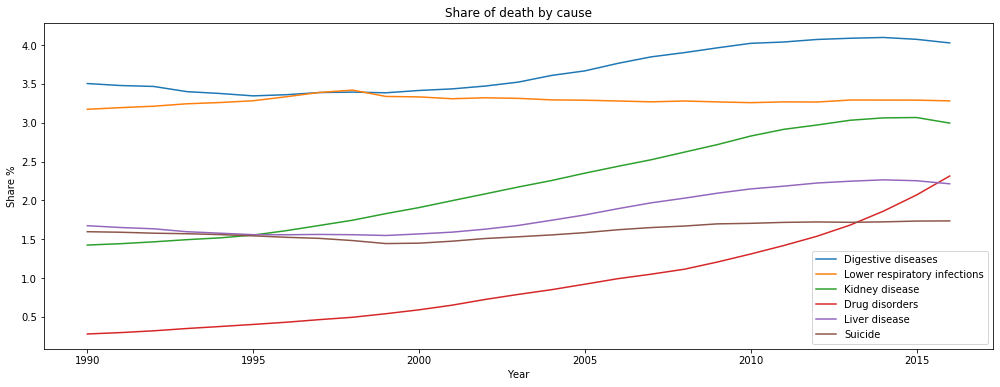

In [62]:
share_of_death_low()

Here we notice some inconsistencies when we compare the data to the share of cases dataset.It's normal for them to grow differently since the share is also affected by the total number of deaths but it's not normal to a cause which killed more pleople to have smaller share than one that killed more.For examle we noticed from before that digestive diseases have the biggest(from diseases that caused less than 5% of deaths) share but when it comes down to number of deaths they have caused less people that lower respiratory infections, kidney disease and liver disease.Also even though by 2016 drug disorders have bigger share than liver disease and suicide they caused the least amount of cases.

There are a few things which may be causing this the first is that the data is wrong.But since this data is taken from the National Center for Health Statistics this is highly unlikely and if that is the case this should be very alarming.The second thing which may cause it is inconsistencies in the way that the cause is defined since the data is taken from two diferent researches.For example if a person dies from diabetes mellitus should this also be counted as death from diabetes or a more interesting case if a person which suffers from cancer dies from pneumonia which is caused by the weakening of his immune system by the chemotherapy should this death be counted as death by cancer, chemotherapy, pneumonia or all of the above.This is also creates issues when it comes down to how survival rates are formed on cancer and chemotherapy.Some organizations make their statistics this way if in five years after a person has been cured from cancer he dies by another cause for example pneumonia the death is counted as death by the cancer (as a side effect by the cancer treatment).But other pharmaceutical companies(which make chemotherapy treatment) count the therapy unsuccessful only if you die by the cancer.So in the previously mentioned case if you die from pneumonia caused by the side effects if the chemotherapy(weakening of the immune system) the treatment is considered successful.It is considered unsuccessful only if you die by the cancer or the chemotherapy directly.

Also there are certain studies which show that dementia is linked to kidney disease, respiratory diseases and cardiovascular disease and if we check to see if there is any correlation we see that it's very strong when it comes down to kidney and respiratory diseases but is absolutly negative when it comes down to cardiovascular diseases.This is due to the fact that this is the number of deaths by a cause and is normal since the population is growing that the death cases increase similarly.Showing correlation where there is none or the opposite.In cases like this is very important to keep in mind that correlation does not mean causation.Still it's important to keep in mind the idea that there is a link between certain diseases(even if doesn't seem to make sense at first sight) and suffering from one might lead to another.And the it's good to keep in mind that you can prevent one disease by preveting another one.

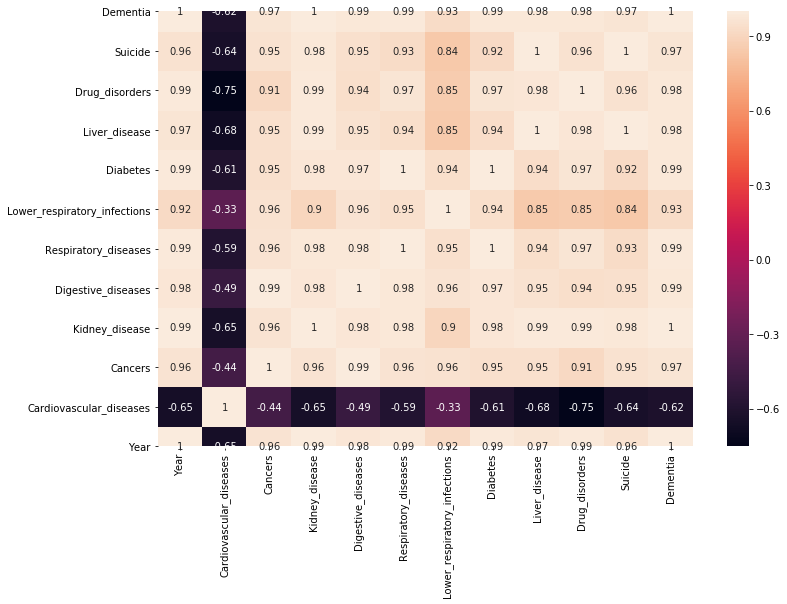

In [63]:
plt.figure(figsize = (12, 8))
ax = sns.heatmap(num_of_deaths.corr(), annot= True)
ax.invert_yaxis()

### Conclusion 
Human health has increased significantly in recent history.Thanks to advances in hygiene, medicine and quality of life.But despite that we still should be concerned the growth of life expectancy has decreased due to lack of care for our health.Also we need to be more aware the connections between certain diseases and on that how we define cause of death.People die in the US mostly from non-communicable diseases which shows that preventable epidemics are no longer such an issue.But whe should still be aware of the possibylity of another big pandemic like the Spanish influenza 100 years ago, since historically big pandemics happen once a century.What is currently the most important thing for one's health is their personal care on their health and no matter how much medicine improves it can't cure bad self care.And since people take less care for themselves now this should be the biggest health concern for well developed contries like the United States.

## resources
https://en.wikipedia.org/wiki/Soap

https://en.wikipedia.org/wiki/Antibiotic

https://en.wikipedia.org/wiki/Penicillin

https://en.wikipedia.org/wiki/List_of_wars_involving_the_United_States#See_also

https://www.infoplease.com/science-health/health/major-us-epidemics

https://www.usa.gov/statistics

https://en.wikipedia.org/wiki/Spanish_flu

https://en.wikipedia.org/wiki/Posey_War

https://ourworldindata.org/why-do-women-live-longer-than-men

https://en.wikipedia.org/wiki/Women_in_the_United_States_Army

https://en.wikipedia.org/wiki/Opioid_epidemic

https://www.kidney.org/news/ekidney/august08/Dementia_august08

https://www.medicalnewstoday.com/articles/323814.php

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3641811/

https://en.wikipedia.org/wiki/Cancer